## Import libraries

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

from pandas import read_csv
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,\
        accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,StackingClassifier,ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB

from time import time
from datetime import timedelta

import seaborn as sns
from matplotlib import pyplot as plt

sns.set()


## Load dataset

In [ ]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/ML/Machine Learning Project. GALINDO - PAGLIA/kickafterpreprocess.csv', sep=";")

Mounted at /content/drive


In [ ]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehicleAge', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'VNST',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'season', 'age_cat',
       'VehOdo_cat', 'VehBCost_cat', 'WarrantyCost_cat'],
      dtype='object')

In [ ]:
df

,IsBadBuy,Auction,VehicleAge,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,VNST,VehBCost,IsOnlineSale,WarrantyCost,season,age_cat,VehOdo_cat,VehBCost_cat,WarrantyCost_cat
0,0,ADESA,3,SEDAN,RED,AUTO,Alloy,89046,ASIAN,MEDIUM,EAST,7100.0,no,1113,winter,0to3_years,>82383,6710-7900,837-1155
1,0,ADESA,5,CAB,WHITE,AUTO,Alloy,93593,AMERICAN,TRUCK,EAST,7600.0,no,1053,winter,3to6_years,>82383,6710-7900,837-1155
2,0,ADESA,4,SEDAN,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,EAST,4900.0,no,1389,winter,3to6_years,73322-82383,0-5440,1155-1623
3,0,ADESA,5,SEDAN,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,EAST,4100.0,no,630,winter,3to6_years,61815-73322,0-5440,0-837
4,0,ADESA,4,COUPE,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,EAST,4000.0,no,1020,winter,3to6_years,61815-73322,0-5440,837-1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69727,0,ADESA,3,SEDAN,GREEN,AUTO,Covers,68127,AMERICAN,OTHER,EAST,4200.0,no,1215,fall,0to3_years,61815-73322,0-5440,1155-1623
69728,0,ADESA,7,CAB,GOLD,AUTO,Alloy,93744,AMERICAN,TRUCK,EAST,6200.0,no,1353,winter,6to9_years,>82383,5440-6710,1155-1623
69729,0,ADESA,2,SEDAN,SILVER,AUTO,Alloy,74407,ASIAN,MEDIUM,EAST,8200.0,no,803,winter,0to3_years,73322-82383,>7900,0-837
69730,0,ADESA,5,SUV,SILVER,AUTO,Alloy,82563,AMERICAN,SUV,EAST,7000.0,no,1243,winter,3to6_years,>82383,6710-7900,1155-1623


In [ ]:
df = df.drop(columns=['VehicleAge','VehOdo','VehBCost','WarrantyCost'])

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
y=df['IsBadBuy']
X=df.drop(columns='IsBadBuy')
X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.20, random_state=2022)

# Modelling

## Metrics

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.303174
         Iterations 7
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.048      
Dependent Variable:    IsBadBuy            AIC:                 27166.0897 
Date:                  2022-06-10 19:32    BIC:                 27627.5139 
No. Observations:      44628               Log-Likelihood:      -13530.    
Df Model:              52                  LL-Null:             -14218.    
Df Residuals:          44575               LLR p-value:         7.6129e-254
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        7.0000                                              
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Auction_MANHEIM  

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(Cs=20, random_state=2022, cv = 10, scoring = 'accuracy', max_iter=400, verbose=1)
logreg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


LogisticRegressionCV(Cs=20, cv=10, max_iter=400, random_state=2022,
                     scoring='accuracy', verbose=1)

In [ ]:
logreg

LogisticRegressionCV(Cs=20, cv=10, max_iter=400, random_state=2022,
                     scoring='accuracy', verbose=1)

In [ ]:
grid_values = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
logreg1 = LogisticRegression()
clf = GridSearchCV(logreg1,                    # model
                   param_grid = grid_values,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)

In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Accuracy : 0.9029308966307262


In [ ]:
logreg = LogisticRegression(C = 0.001, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_val)
print("Accuracy:",logreg.score(X_val, y_val))

Accuracy: 0.9023034866003405


In [ ]:
confusion_matrix(y_pred, y_val)

array([[10067,  1090],
       [    0,     0]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [ ]:
score = logreg.score(X_val, y_val)
print(score)

0.9023034866003405


In [ ]:
cm = metrics.confusion_matrix(y_val, y_pred)
print(cm)

[[10067     0]
 [ 1090     0]]


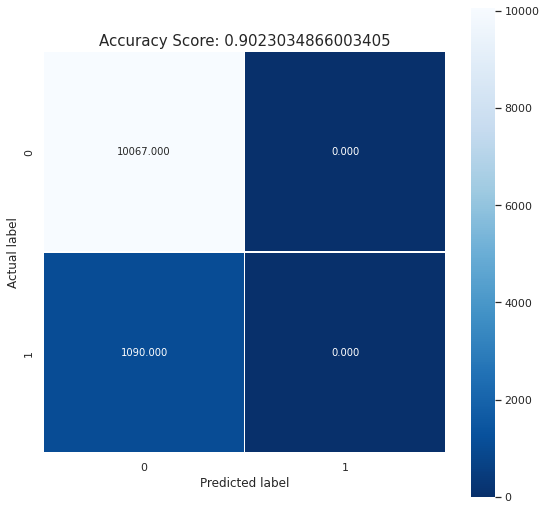

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

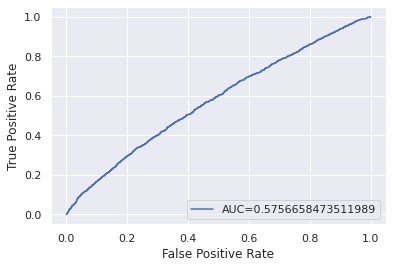

In [ ]:
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()